In [1]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#  Copyright 2021-  QuOCS Team
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [2]:
import matplotlib.pyplot as plt
import os

# Parameter Optimization

### Define the Model

In [3]:
import numpy as np
from scipy.optimize import rosen

from quocslib.utils.AbstractFoM import AbstractFoM


class RosenFoM(AbstractFoM):

    def __init__(self, args_dict: dict = None):
        if args_dict is None:
            args_dict = {}

    def get_FoM(self, pulses: list = [], parameters: list = [], timegrids: list = []) -> dict:
        """ """
        FoM = rosen(np.asarray(parameters))
        return {"FoM": FoM}


### Define the Configuration dictionary

#### Name

In [4]:
optimization_dictionary = {"optimization_client_name": "IsingModeldCRAB"}

#### The algorithm

The name

In [5]:
optimization_dictionary["algorithm_settings"] = { "algorithm_name": "DirectSearch"}

#### Updating algorithm and Stopping criteria

In [6]:
dsm_settings = {
        "general_settings": {
            "dsm_algorithm_name": "NelderMead",
            "is_adaptive": False
        },
        "stopping_criteria": {
            "xatol": 1e-5,
            "frtol": 1e-5
        }
    }

In [7]:
optimization_dictionary["algorithm_settings"]["dsm_settings"] = dsm_settings

#### The Controls

In [8]:
total_number_of_parameters = 10
parameters = []
for index in range(total_number_of_parameters):
    parameters.append({"parameter_name": "Parameter{0}".format(index),
                       "lower_limit": -2.0,
                       "upper_limit": 2.0,
                       "initial_value": 0.4,
                       "amplitude_variation": 0.5})

Insert the controls in the optimization dictionary

In [9]:
optimization_dictionary["pulses"] = []
optimization_dictionary["parameters"] = parameters
optimization_dictionary["times"] = []

### Create the optimizer and run the optimization

In [10]:
from quocslib.Optimizer import Optimizer
import time
# Define Optimizer
optimization_obj = Optimizer(optimization_dictionary, RosenFoM())
print("The optimization initialized successfully")

INFO     oc_logger    The optimization direction is minimization
The optimization initialized successfully


In [11]:
time1 = time.time()
optimization_obj.execute()
time2 = time.time()
print("The optimization took {seconds} seconds".format(seconds=time2 - time1))

INFO     oc_logger    QuOCS version number: 0.0.27
INFO     oc_logger    Function evaluation number: 1, FoM: 55.08
INFO     oc_logger    Function evaluation number: 2, FoM: 81.75808827042091
INFO     oc_logger    Function evaluation number: 3, FoM: 90.25768148115392
INFO     oc_logger    Function evaluation number: 4, FoM: 114.03086822206332
INFO     oc_logger    Function evaluation number: 5, FoM: 115.78222796051351
INFO     oc_logger    Function evaluation number: 6, FoM: 114.31112073674157
INFO     oc_logger    Function evaluation number: 7, FoM: 102.2965532026575
INFO     oc_logger    Function evaluation number: 8, FoM: 113.41313155371205
INFO     oc_logger    Function evaluation number: 9, FoM: 113.41190777059312
INFO     oc_logger    Function evaluation number: 10, FoM: 116.11836523860964
INFO     oc_logger    Function evaluation number: 11, FoM: 105.30742177289105
INFO     oc_logger    Function evaluation number: 12, FoM: 93.6124889906295
INFO     oc_logger    Function evaluatio

Parameter Name: Parameter0, Value: 1.0000001886432646
Parameter Name: Parameter1, Value: 1.0000003261937351
Parameter Name: Parameter2, Value: 0.9999997853296478
Parameter Name: Parameter3, Value: 0.9999995814870124
Parameter Name: Parameter4, Value: 0.9999993624599877
Parameter Name: Parameter5, Value: 1.00000014505755
Parameter Name: Parameter6, Value: 0.999999566135091
Parameter Name: Parameter7, Value: 0.999999659363392
Parameter Name: Parameter8, Value: 0.9999987677869603
Parameter Name: Parameter9, Value: 0.9999981900303891


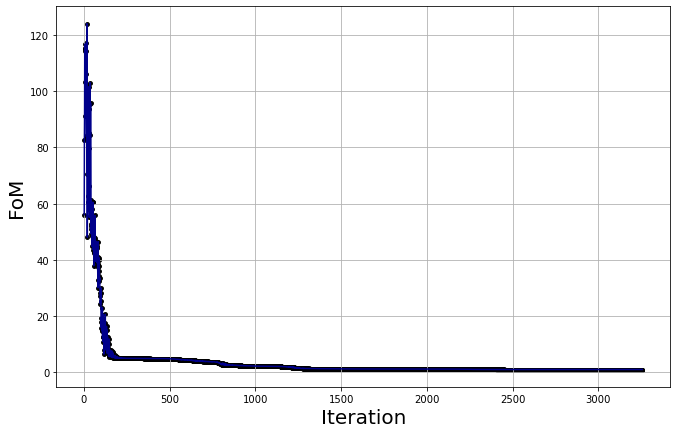

In [13]:
opt_alg_obj = optimization_obj.get_optimization_algorithm()
# FoM vs Iterations
fomlist = opt_alg_obj.FoM_list
fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111)
iterations = range(1, len(fomlist)+1)
ax.plot(iterations, 1 + np.asarray(fomlist), color='darkblue', linewidth=1.5, zorder=10)
ax.scatter(iterations, 1 + np.asarray(fomlist), color='k', s=15)
plt.grid(True, which="both")
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('FoM', fontsize=20)
# Write down the parameters
controls = opt_alg_obj.get_best_controls()
for index, parameter_value in enumerate(controls["parameters"]):
    print("Parameter Name: {0}, Value: {1}".format(parameters[index]["parameter_name"], parameter_value) )

In [15]:
import quocslib
quocslib.__VERSION__

'0.0.27'